<h2><span style="color:green"><div style="text-align: center;"><b>MLOPS: Assignment2- End-to-End Machine Learning Workflow with KizenML, XAI, and Cloud Deployment</div></b></span></h2> 
<h2><span style="color:green"><b>Group Name: MLOPS Group 21</b></span></h2> 
<h2><span style="color:green">Student details:</span></h2>
<span style="color:green"><b>

1. SUDHIR KUMAR GUPTA <b>(2022AC05556)<br>
2. SANDEEP KUMAR GUPTA <b>(2022AC05664)<br>
3. RAJAT GUPTA <b>(2022AC05378)<br>
4. DANISH HASARAT <b>(2022AC05647)<br>
5. AFTAB HASSAN <b>(2022AC05329)<br>

# <span style="color:green">Task 1.Data Collection and Preprocessing:</span>
**Task:**  
Select an appropriate dataset and perform data preprocessing, including data cleaning, feature engineering, and scaling/normalization.

**Details:**  
Explain the choices made during preprocessing and how they impact the model. Use KizenML or other tools for AutoEDA if applicable.

### Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

### Loading dataset

In [2]:
# Load the dataset
url = 'titanic.csv'
df = pd.read_csv(url)

# Step 1: Data Collection
print(f"Dataset Shape: {df.shape}")
print("First 5 rows of the dataset:")
print(df.head())

Dataset Shape: (891, 12)
First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4

### Data AutoEDA using Autoviz tool

In [3]:
# Import necessary libraries
from autoviz.AutoViz_Class import AutoViz_Class
# Initialize AutoViz
AV = AutoViz_Class()

# Perform AutoEDA - Note: Provide the pandas dataframe as the second argument
df_report = AV.AutoViz(filename='titanic.csv', dfte=df, depVar='', verbose=0, header=0, lowess=False)

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (891, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    12 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
PassengerId,int64,0.000000,100,1.000000,891.000000,Possible ID column: drop before modeling step.
Survived,int64,0.000000,0,0.000000,1.000000,No issue
Pclass,int64,0.000000,0,1.000000,3.000000,No issue
Name,object,0.000000,100,,,No issue
Sex,object,0.000000,0,,,No issue
Age,float64,19.865320,NA,0.420000,80.000000,"177 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 11 outliers greater than upper bound (64.81) or lower than lower bound(-6.69). Cap them or remove them."
SibSp,int64,0.000000,0,0.000000,8.000000,Column has 46 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them.
Parch,int64,0.000000,0,0.000000,6.000000,Column has 213 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.
Ticket,object,0.000000,76,,,Possible high cardinality column with 681 unique values: Use hash encoding or text embedding to reduce dimension.
Fare,float64,0.000000,NA,0.000000,512.329200,Column has 116 outliers greater than upper bound (65.63) or lower than lower bound(-26.72). Cap them or remove them.


Number of All Scatter Plots = 3


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\aftab\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\aftab\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\aftab\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\aftab\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\aftab\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

All Plots done
Time to run AutoViz = 31 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


### Data Cleaning

In [4]:
# Step 2: Data Cleaning

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:\n", missing_values)

# Impute missing values for 'Age' and 'Embarked'
df['Age'] = df['Age'].fillna(df['Age'].median())  # Filling missing age values with median
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Filling missing 'Embarked' with mode

# Drop 'Cabin' column (too many missing values) and irrelevant columns 'PassengerId', 'Ticket', 'Name'
df.drop(['Cabin', 'PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)


Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Feature Engineering

In [5]:
# Step 3: Feature Engineering

# Create new feature 'FamilySize' (Parch + SibSp)
df['FamilySize'] = df['Parch'] + df['SibSp']

# Convert 'Sex' into numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,1
2,1,3,1,26.0,0,0,7.9250,S,0
3,1,1,1,35.0,1,0,53.1000,S,1
4,0,3,0,35.0,0,0,8.0500,S,0


### Scaling/Normalization

In [6]:
# Step 4: Scaling/Normalization

# Separate features and target
X = df.drop(['Survived'], axis=1)
y = df['Survived']

# Define numerical and categorical columns
numerical_cols = ['Age', 'Fare', 'FamilySize']
categorical_cols = ['Pclass', 'Sex', 'Embarked']

# Preprocessing pipeline
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer to apply pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

# Apply the transformations
X_transformed = preprocessor.fit_transform(X)

# (Optional) Dimensionality Reduction using PCA
pca = PCA(n_components=0.95)  # Preserve 95% variance
X_pca = pca.fit_transform(X_transformed)

# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

print("\nPreprocessed data shape:", X_train.shape)


Preprocessed data shape: (712, 7)


## Explaination:


### 1. Handling Missing Values
- **Age Column**: Missing values were imputed with the median to avoid skewing the distribution.
- **Embarked Column**: Missing values were filled with the mode as it is a categorical feature.
- **Cabin Column**: Dropped due to a high proportion of missing values.
- **Irrelevant Columns**: PassengerId, Ticket, and Name were removed to reduce dimensionality as they don't contribute to the prediction.

### 2. Feature Engineering
- **FamilySize**: Created by combining the `Parch` (Parents/Children) and `SibSp` (Siblings/Spouses) columns. This new feature gives insights into family influence on survival.
- **Sex**: Converted into numerical values (0 for male, 1 for female) to allow the model to process the data.

### 3. Scaling/Normalization
- **Numerical Features**: `Age`, `Fare`, and `FamilySize` were standardized using `StandardScaler`. This ensures that features contribute equally to the model’s learning process and prevents those with larger ranges from dominating the training.

### 4. One-Hot Encoding
- **Categorical Features**: `Pclass`, `Embarked`, and `Sex` were one-hot encoded to avoid introducing any ordinal relationships between the categories, enabling the model to treat each category independently.

### 5. Dimensionality Reduction
- **PCA (Principal Component Analysis)**: Applied to reduce feature dimensionality while retaining 95% of the variance. This step improves computational efficiency and helps prevent overfitting.

### 6. Train-Test Split
- The data was split into **training and testing sets** with an 80-20 split. This ensures the model can be evaluated on unseen data, helping to assess generalization performance.



# <span style="color:green">Task 2.Model Selection, Training, and Hyperparameter Tuning:</span>
**Task:**  
Train multiple models, tune hyperparameters, and select the best-performing model.

**Details:**  
Utilize tools like AutoML, KizenML, or others for model selection and
hyperparameter tuning. Document the experimentation process and justify your model
choice.

In [7]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import joblib

### Defining models

In [8]:
# Define models
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

### Hyperparameters for tuning

In [9]:
# Define hyperparameters for tuning
logistic_params = {'C': [0.1, 1.0, 10]}
random_forest_params = {'n_estimators': [100, 200], 'max_depth': [5, 10, 15]}
xgb_params = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 6]}

# Define GridSearchCV for each model
logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=5, n_jobs=-1)
random_forest_grid = GridSearchCV(random_forest_model, random_forest_params, cv=5, n_jobs=-1)
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, n_jobs=-1)


### Trainning models with GridSearchCV

In [10]:
# Train models with GridSearchCV
print("Training Logistic Regression...")
logistic_grid.fit(X_train, y_train)

print("Training Random Forest...")
random_forest_grid.fit(X_train, y_train)

print("Training XGBoost...")
xgb_grid.fit(X_train, y_train)

# Get best hyperparameters and train models
print("\nBest Parameters Logistic Regression:", logistic_grid.best_params_)
print("Best Parameters Random Forest:", random_forest_grid.best_params_)
print("Best Parameters XGBoost:", xgb_grid.best_params_)

Training Logistic Regression...
Training Random Forest...
Training XGBoost...

Best Parameters Logistic Regression: {'C': 0.1}
Best Parameters Random Forest: {'max_depth': 5, 'n_estimators': 100}
Best Parameters XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


### Predictions and Evaluate models

In [11]:
# Predictions
logistic_pred = logistic_grid.predict(X_test)
random_forest_pred = random_forest_grid.predict(X_test)
xgb_pred = xgb_grid.predict(X_test)

# Evaluate models
logistic_acc = accuracy_score(y_test, logistic_pred)
random_forest_acc = accuracy_score(y_test, random_forest_pred)
xgb_acc = accuracy_score(y_test, xgb_pred)

print("\nLogistic Regression Accuracy: {:.4f}".format(logistic_acc))
print("Random Forest Accuracy: {:.4f}".format(random_forest_acc))
print("XGBoost Accuracy: {:.4f}".format(xgb_acc))


Logistic Regression Accuracy: 0.7933
Random Forest Accuracy: 0.8045
XGBoost Accuracy: 0.7877


### Classification Reports

In [12]:
# Classification reports
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, logistic_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, random_forest_pred))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_pred))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.77      0.69      0.73        74

    accuracy                           0.79       179
   macro avg 

### Save the best model

In [13]:
# Save the best model using joblib
def save_model(model, filename):
    joblib.dump(model, filename)
    print(f"Model saved as {filename}")

# Save the models
save_model(logistic_grid.best_estimator_, "best_logistic_model.pkl")
save_model(random_forest_grid.best_estimator_, "best_random_forest_model.pkl")
save_model(xgb_grid.best_estimator_, "best_xgboost_model.pkl")

Model saved as best_logistic_model.pkl
Model saved as best_random_forest_model.pkl
Model saved as best_xgboost_model.pkl


# <span style="color:green">Task 3.Explainable AI (XAI) Implementation:</span>
**Task:**  
Apply Explainable AI techniques to make your model’s predictions interpretable.

**Details:**  
 Use XAI tools such as SHAP, LIME, or others to provide insights into your
model’s decision-making process. Discuss the importance of interpretability in your
model and how XAI tools helped achieve it.

### AutoML Using TPOT
#### TPOT for Model Selection and Hyperparameter Tuning

In [14]:
from tpot import TPOTClassifier

# Use TPOT for AutoML
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20, random_state=42)
tpot.fit(X_train, y_train)

# Evaluate the TPOT model
print("\nTPOT Model Accuracy: {:.4f}".format(tpot.score(X_test, y_test)))

# Export the best pipeline
tpot.export('best_pipeline.py')

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8145572737122034

Generation 2 - Current best internal CV score: 0.8201812272234807

Generation 3 - Current best internal CV score: 0.8201812272234807

Generation 4 - Current best internal CV score: 0.8201812272234807

Generation 5 - Current best internal CV score: 0.8201812272234807

Best pipeline: RandomForestClassifier(BernoulliNB(input_matrix, alpha=10.0, fit_prior=True), bootstrap=True, criterion=gini, max_features=0.2, min_samples_leaf=8, min_samples_split=4, n_estimators=100)

TPOT Model Accuracy: 0.7933


### Interpretability by using explainable AI technique: SHAP

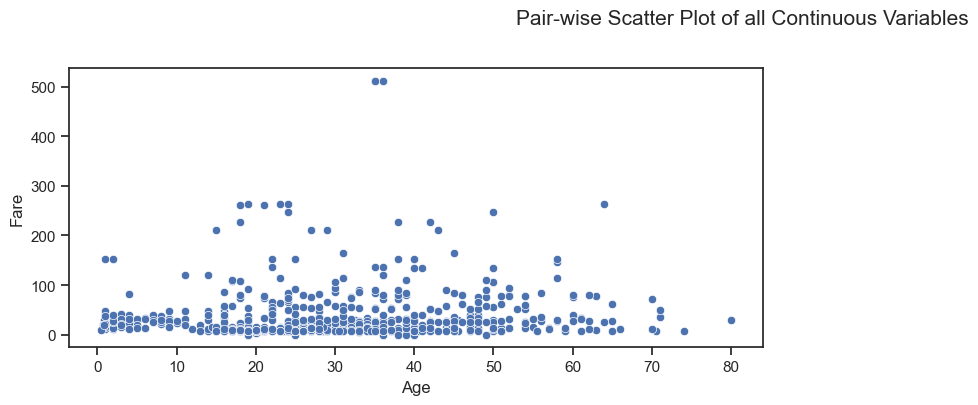

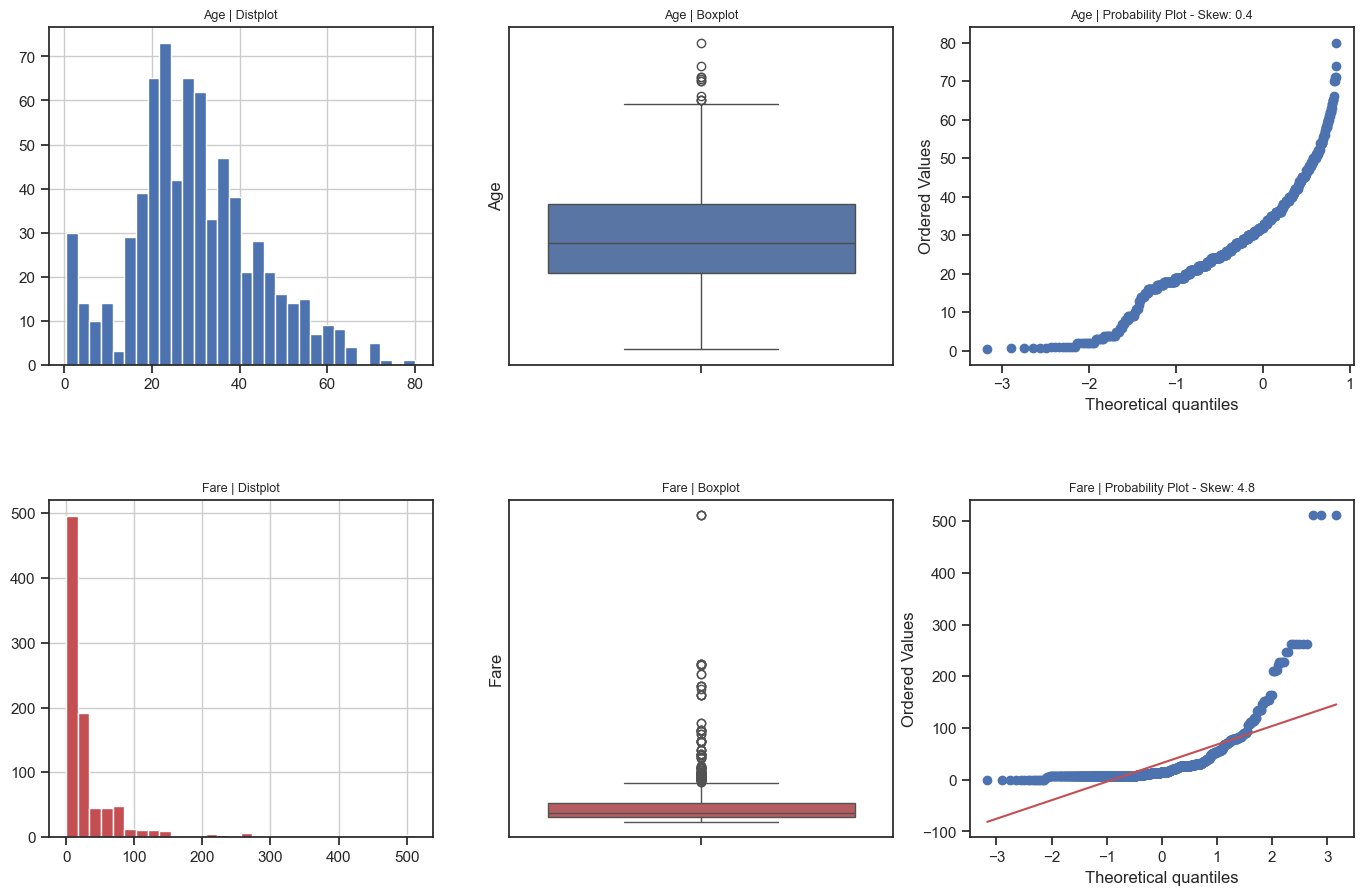

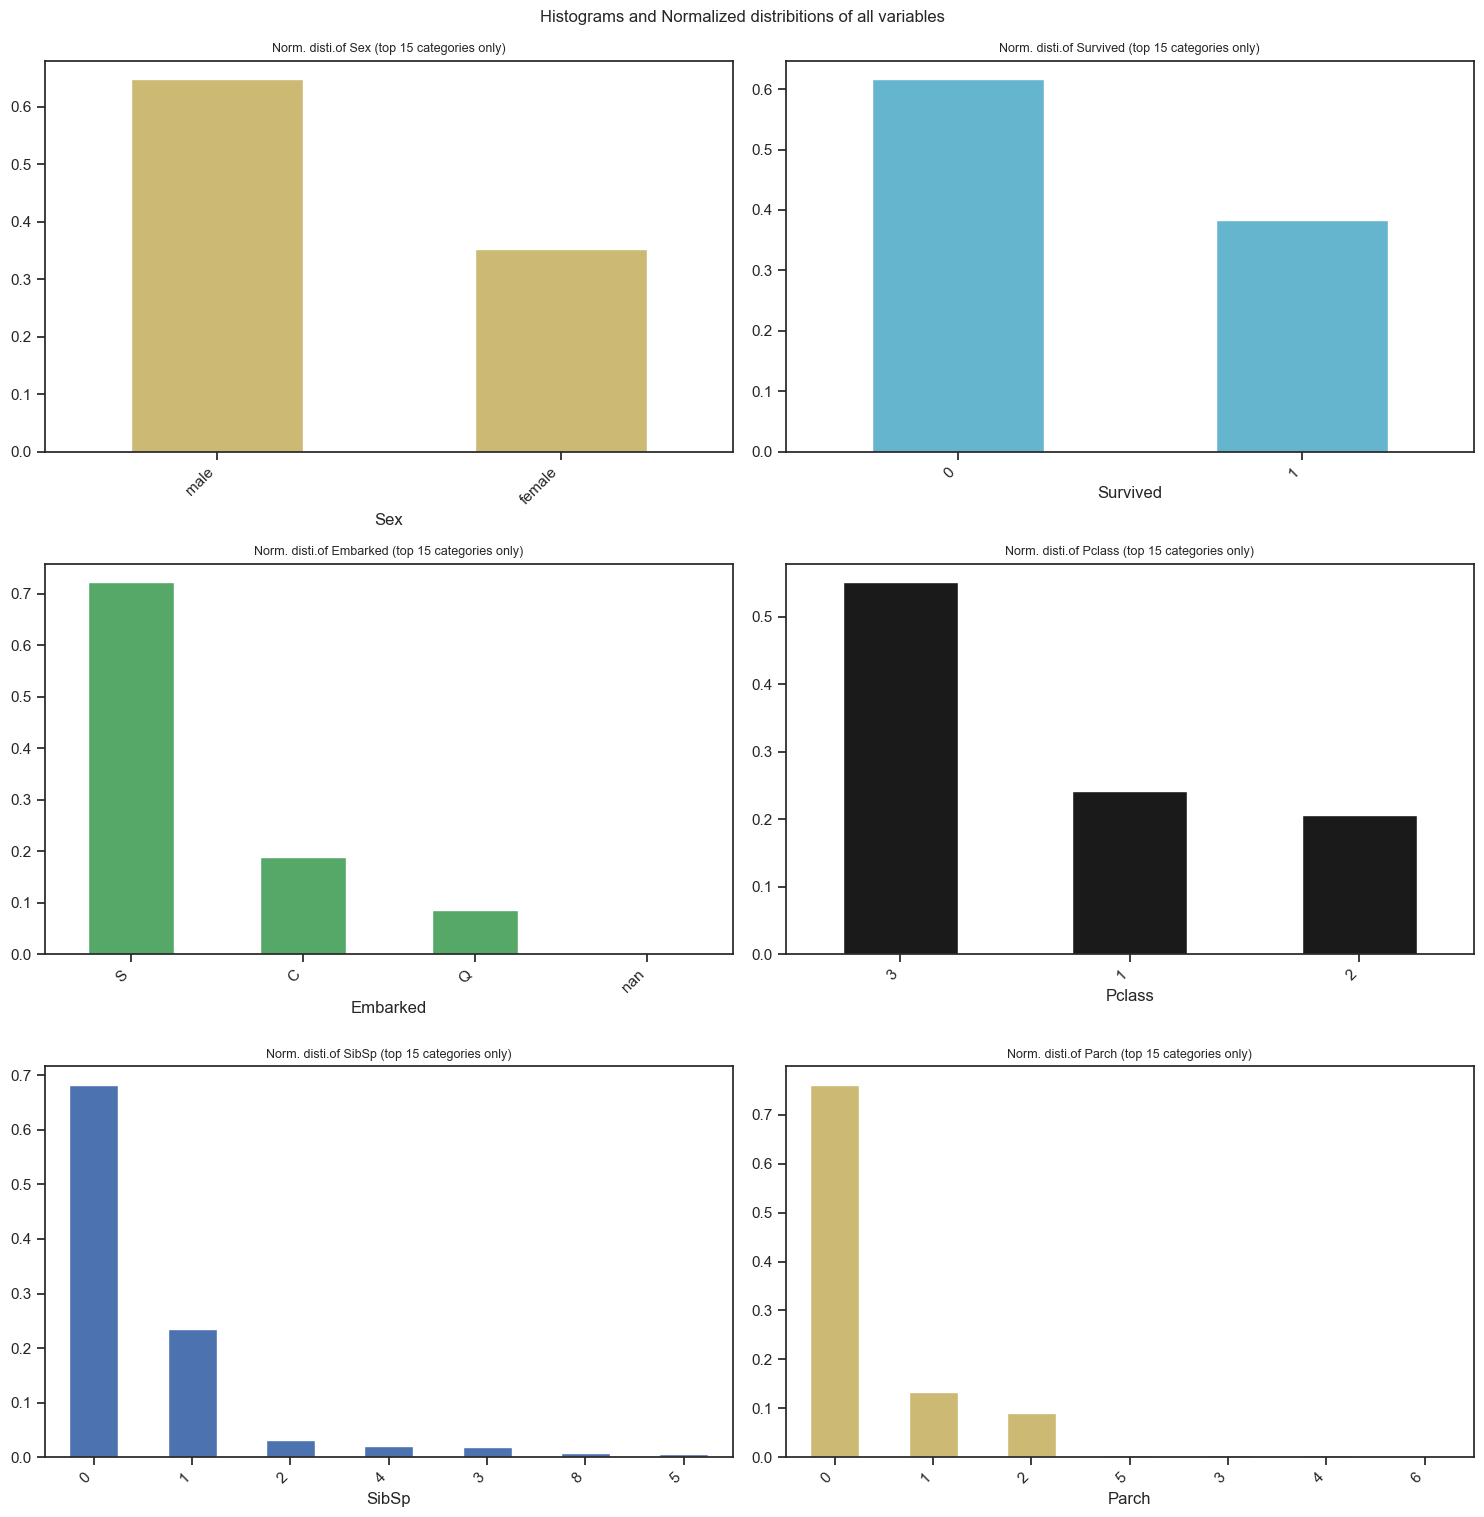

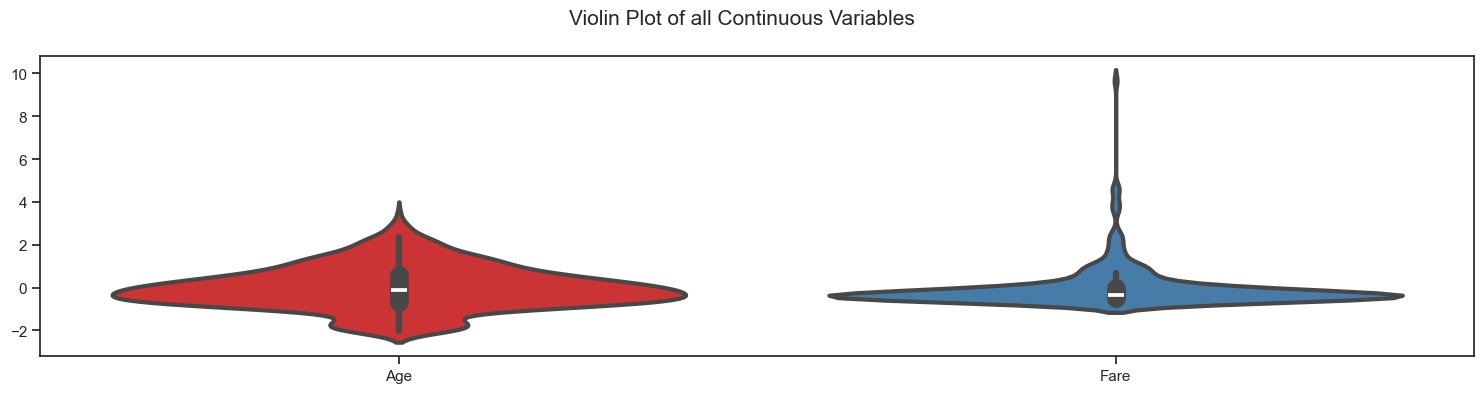

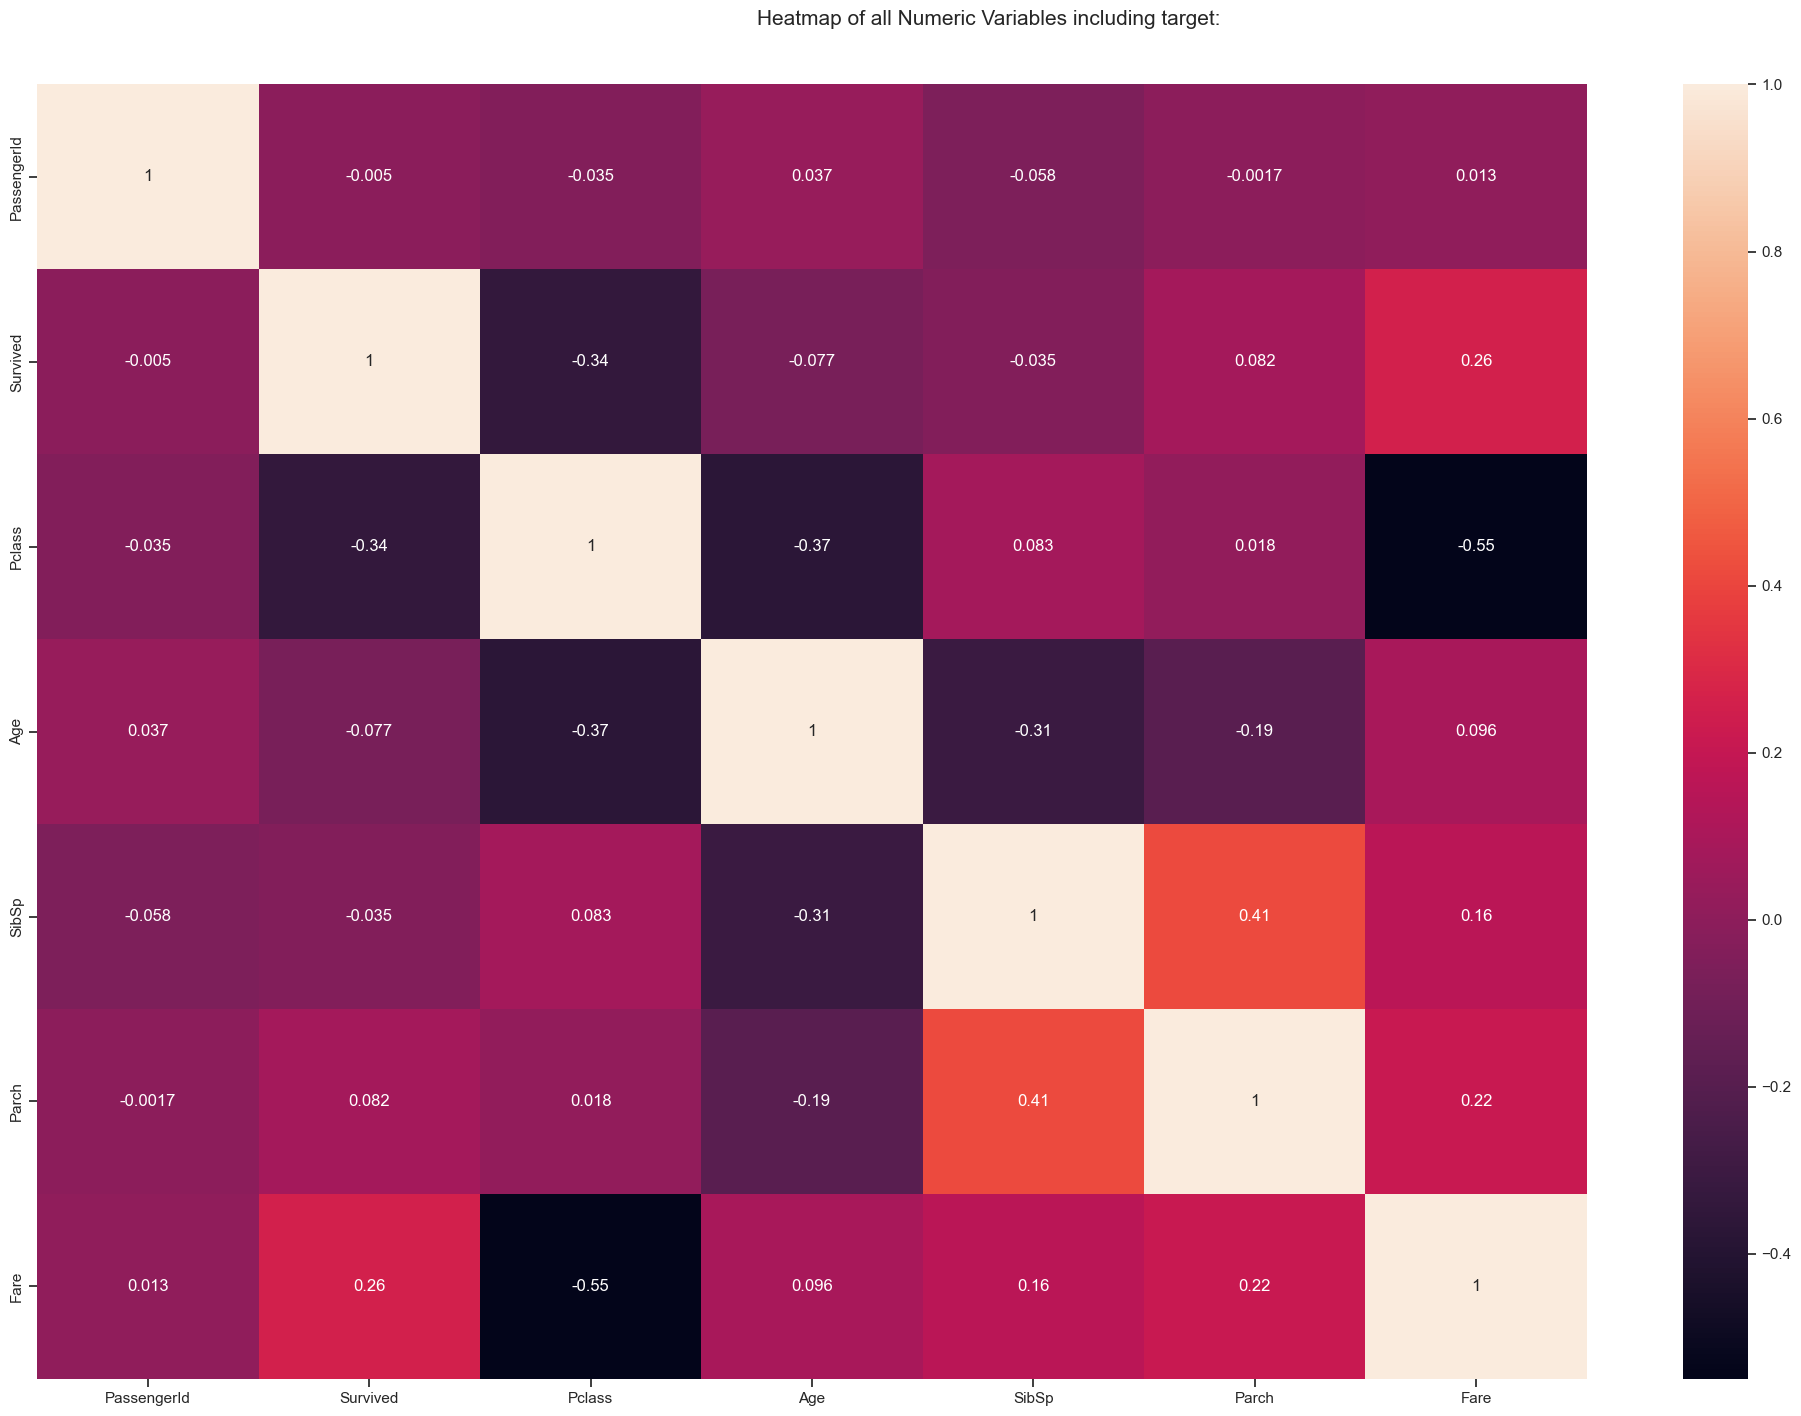

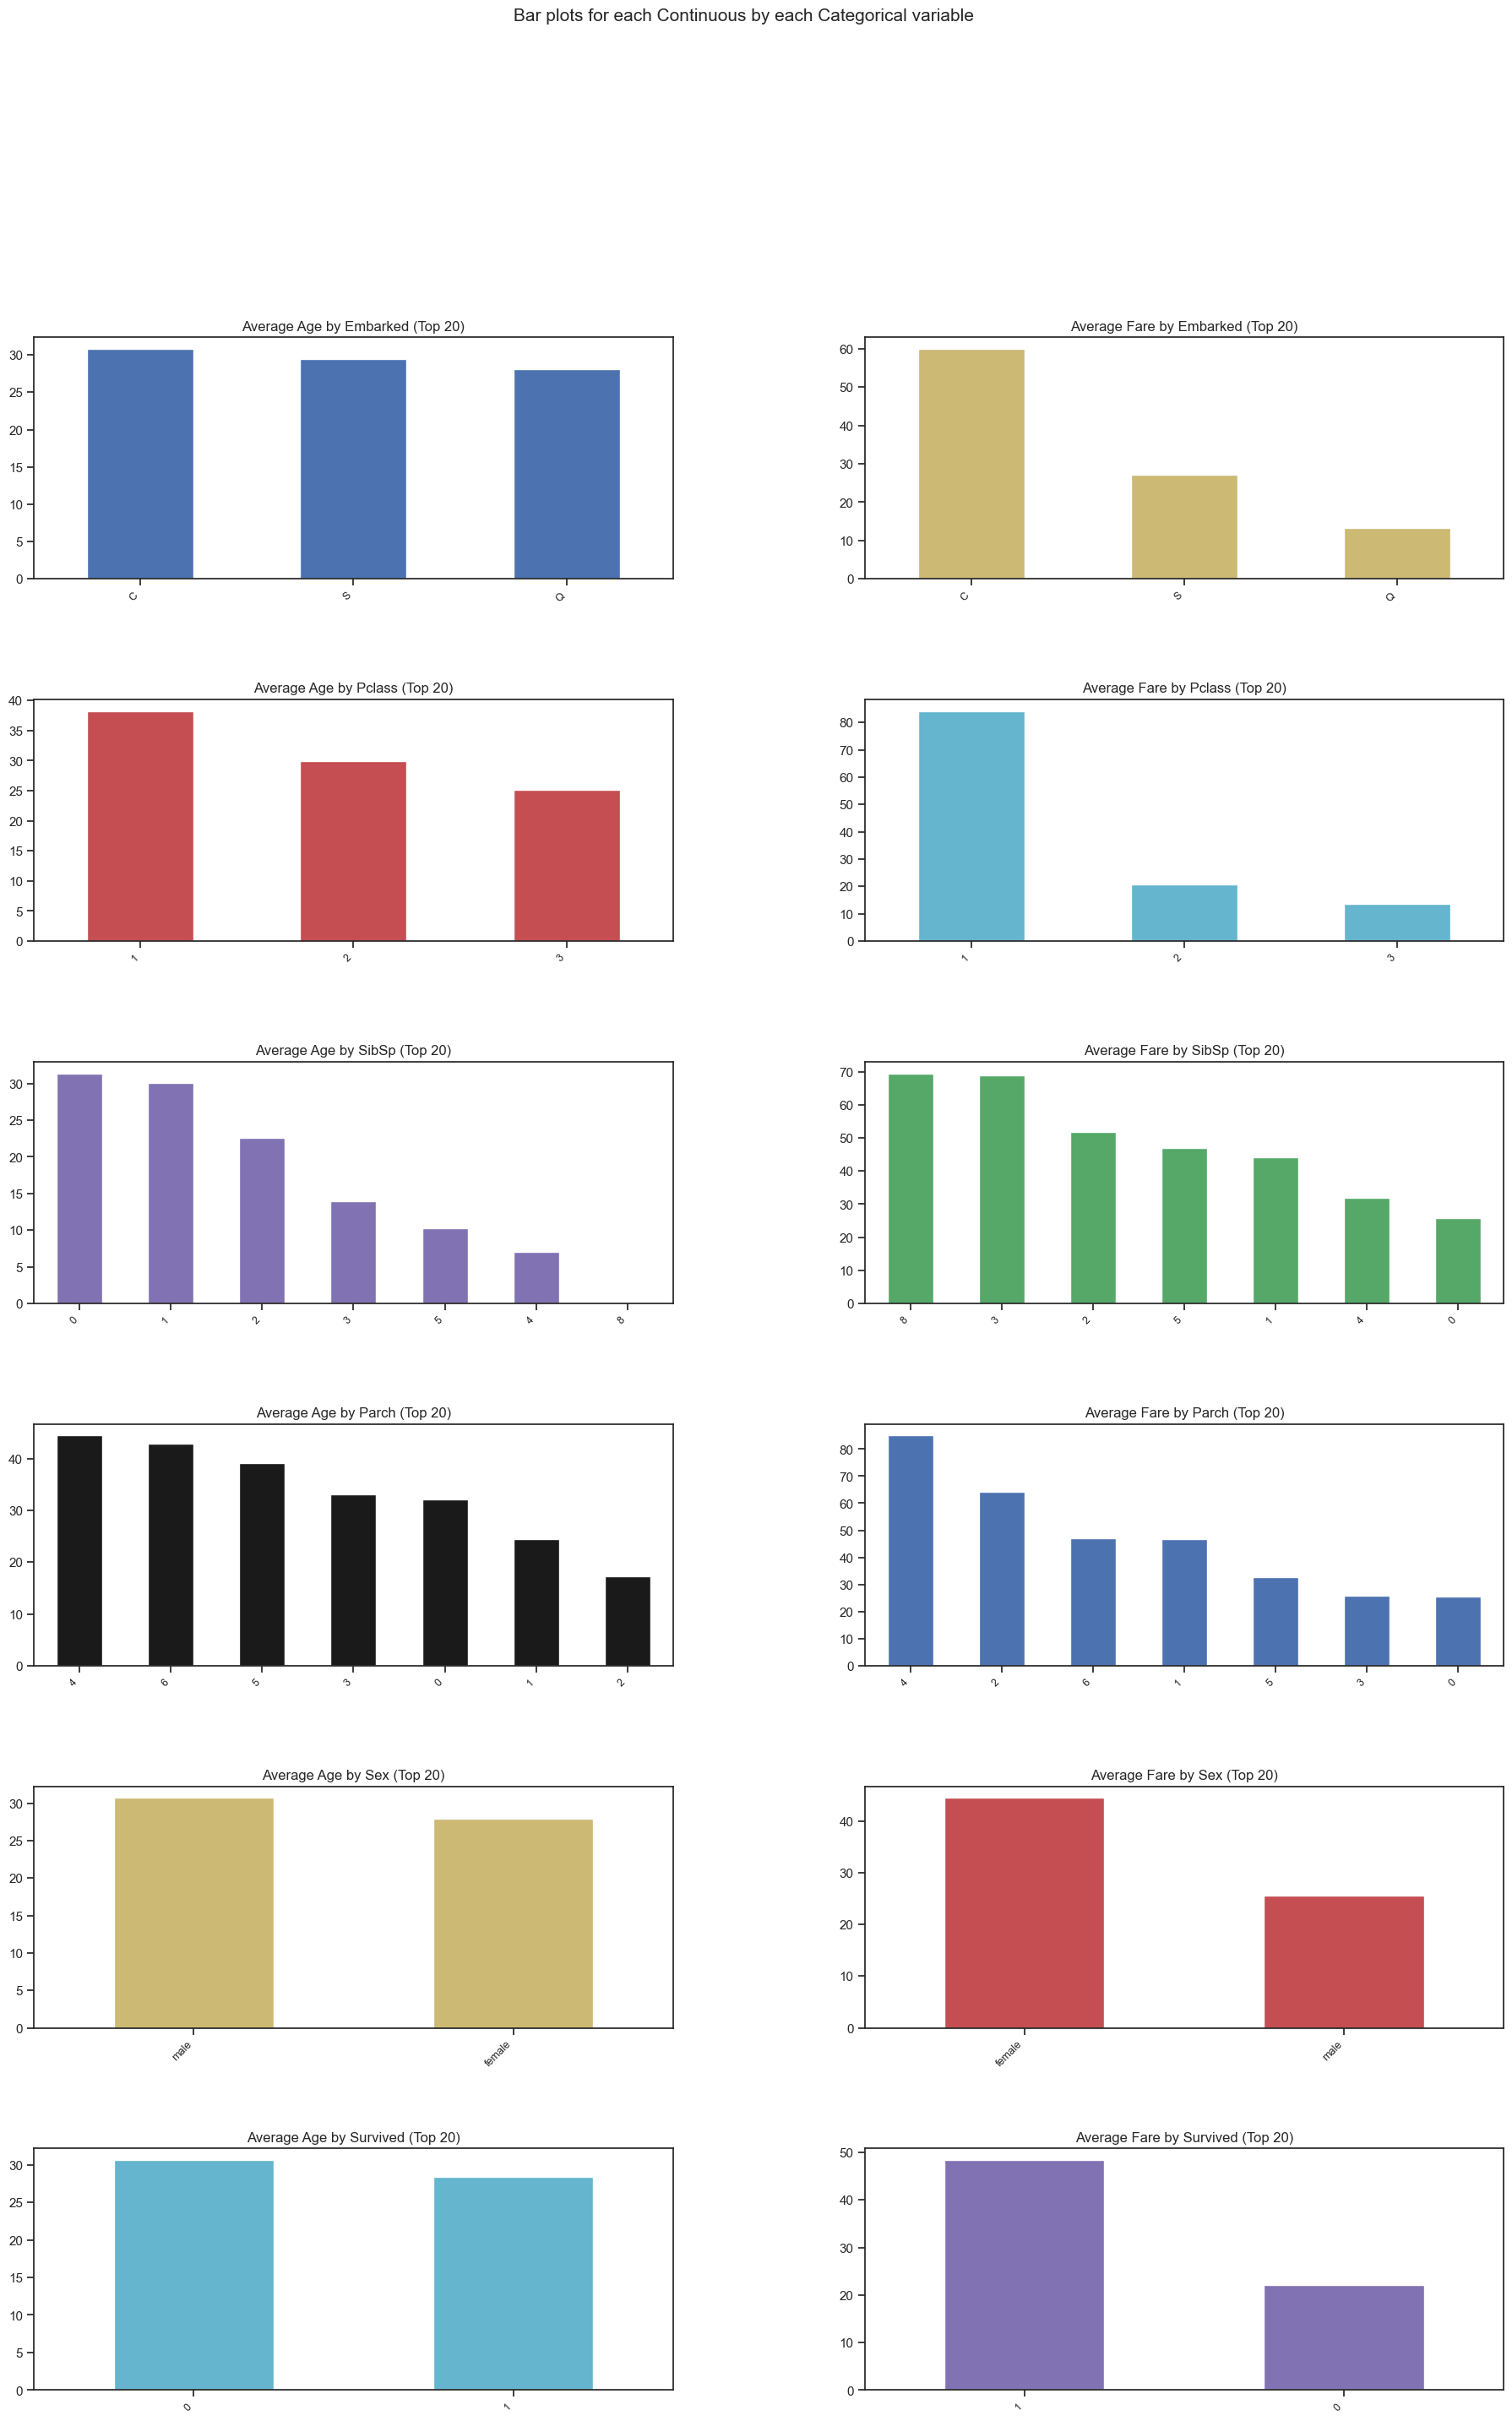

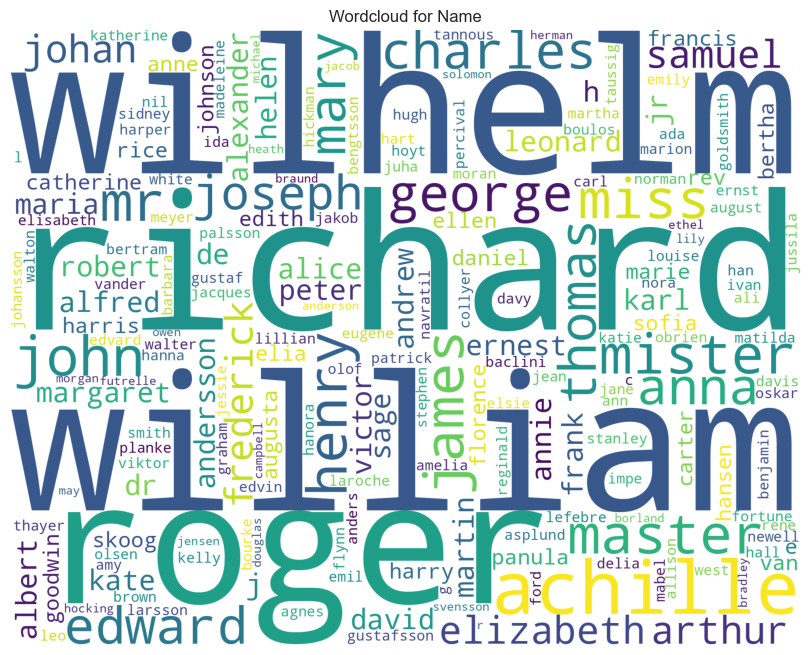

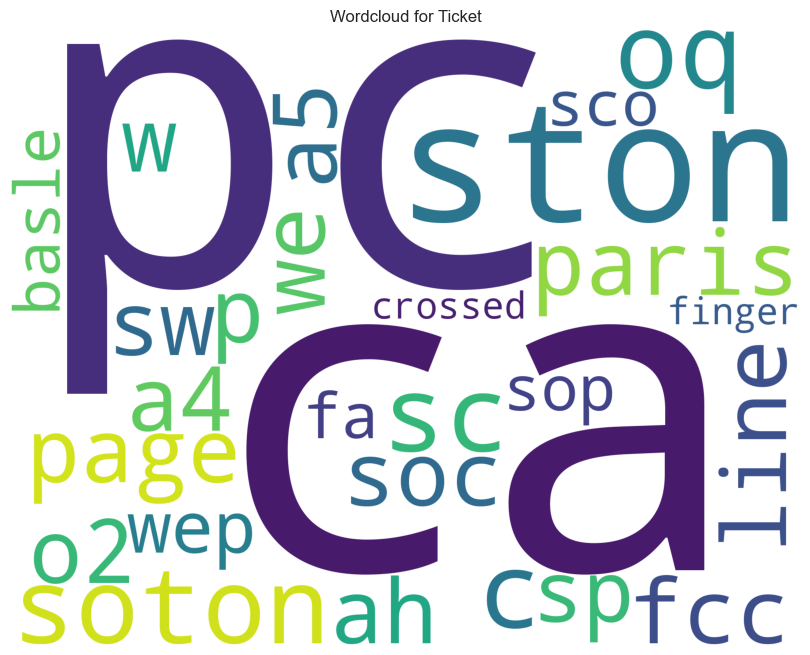

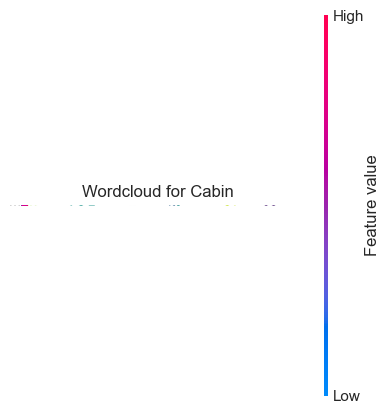

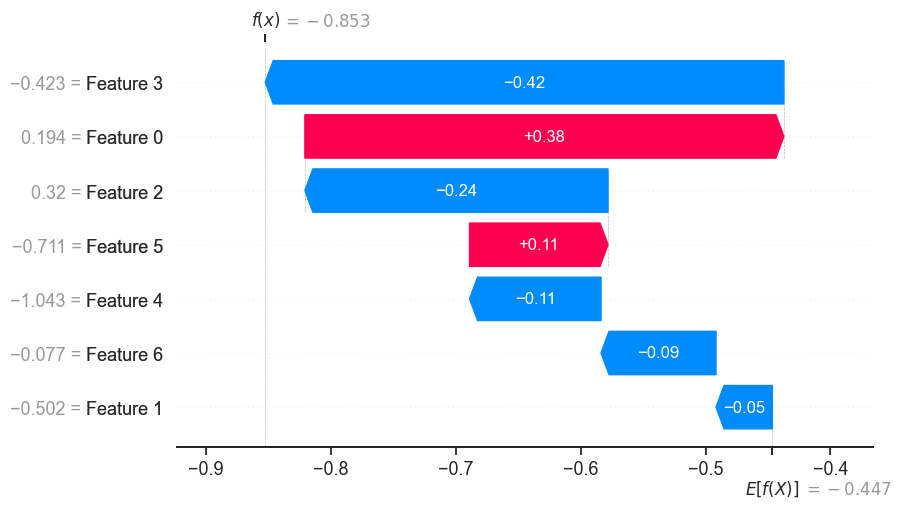

In [15]:
import shap
import matplotlib.pyplot as plt
%matplotlib inline
# Use the best model from previous tasks (assuming XGBoost in this case)
best_model = xgb_grid.best_estimator_

# Create a SHAP explainer for the model
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test)

# Visualize SHAP values for a single prediction
shap.plots.waterfall(shap_values[0])



### Explaination

code uses SHAP to explain the predictions of an XGBoost model. It initializes a SHAP explainer with the trained model and training data, computes SHAP values for the test set, and generates two visualizations: a SHAP summary plot showing feature importance and a waterfall plot explaining a single prediction.

## <span style="color:green">Interpretability by using explainable AI technique: LIME</span>

In [16]:
import lime
import lime.lime_tabular

# Create LIME explainer for tabular data
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    class_names=['Not Survived', 'Survived'],
    mode='classification'
)

# Select a test instance to explain
i = 0  # First test instance
exp = explainer.explain_instance(X_test[i], best_model.predict_proba)

# Show the explanation
exp.show_in_notebook(show_table=True)

# Save explanation to HTML (optional)
exp.save_to_file('lime_explanation.html')


 ### Explaination:

Code uses LIME (Local Interpretable Model-Agnostic Explanations) to explain the predictions of a machine learning classification model. It initializes a LIME explainer for tabular data, selects a test instance for explanation, and generates a visual interpretation of the prediction. The explanation is saved as an HTML file lime_explanation.html

# <span style="color:green">Task 4: Model Deployment Using Cloud Services:</span>
**Task:**  
Deploy your trained model using free-tier cloud services such as AWS or Azure.

**Details:**  
 Create an API or web interface using services like AWS Lambda, Azure
Functions, or any other cloud service. Demonstrate how to make predictions using the
deployed model.

## Implemented sperately using Visual source code

### Code snippet

In [17]:
pip install azure
import logging
import joblib
import json
import numpy as np

# Load the model at the start so that it doesn't need to be loaded on every request
model = joblib.load('best_random_forest_model.pkl')

app = func.FunctionApp(http_auth_level=func.AuthLevel.ANONYMOUS)

@app.route(route="predict")
def predict(req: func.HttpRequest) -> func.HttpResponse:
    logging.info('Python HTTP trigger function processed a request.')

    try:
        # Parse the request body
        req_body = req.get_json()
    except ValueError:
        return func.HttpResponse(
            "Invalid request body. Please pass valid JSON data.", 
            status_code=400
        )
    
    # Ensure that the necessary input data is present
    if 'data' not in req_body:
        return func.HttpResponse(
            "Please provide the input data in the request body as a 'data' field.", 
            status_code=400
        )

    try:
        # Assuming the input is a list of lists (for multiple predictions)
        input_data = np.array(req_body['data'])

        # Perform the prediction using the loaded model
        predictions = model.predict(input_data)

        # Convert the predictions into a JSON response
        result = {
            "predictions": predictions.tolist()
        }

        return func.HttpResponse(
            json.dumps(result),
            status_code=200,
            mimetype="application/json"
        )
    except Exception as e:
        logging.error(f"Error during prediction: {e}")
        return func.HttpResponse(
            "An error occurred while performing prediction. Please check your input data and try again.",
            status_code=500
        )
